02 중고차의 가격을 다중회귀분석으로 분석하고자 한다. 'Price'를 종속변수로, 'Year', 'Transmission', 'Mileage', 'Fuel type', 'Tax', 'Mpg', 'Engine Size'를 독립변수로 사용한다.
데이터의 구성은 아래 표와 같다.
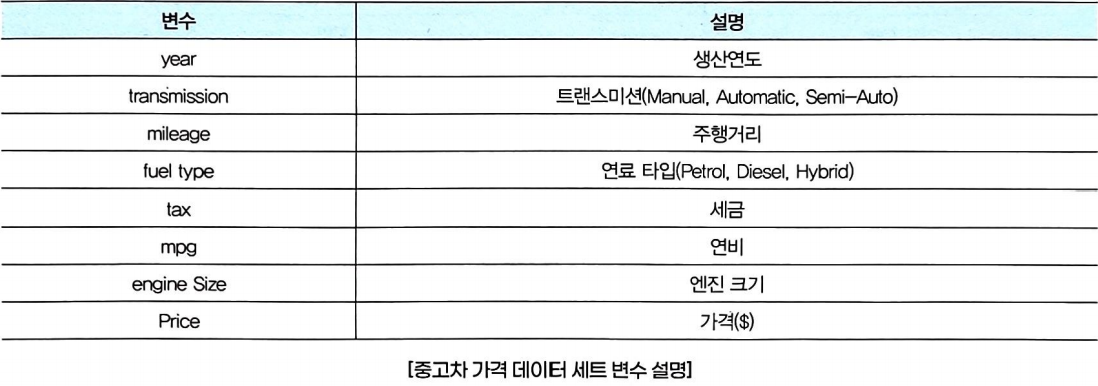

(1) 다중회귀분석 모형의 결정계수를 구하시오.

(2) 독립변수 중 회귀계수가 가장 큰 변수와 그 값을 구하여 튜플 타입으로 출력하시오.(예시 : (Weight, 0.09003569454430438))

(3) 독립변수 중 p-value가 가장 낮은 변수와 그 값을 구하여 튜플 타입으로 출력하시오.

In [27]:
# library 임포트
import pandas as pd
import statsmodels.api as sm

file = '/content/07.03.02-used_car_price_dataset.csv'
df = pd.read_csv(file)
# print(df)
# print(df.info())
# print(df.describe())

# (1) 다중회귀분석 모형의 결정계수를 구하시오.
# 다중회귀 분석 모델을 만들기 위해서 카테고리 값을 라벨 인코딩한다. 인코딩 컬럼이 두 개뿐이기 때문에
# 간단히 map 함수를 이용하여 인코딩하자.
# df.columns

# 카테고리 밸류 라벨인코딩
df['fuelType'] = df['fuelType'].map({'Petrol' : 0, 'Diesel' : 1, 'Hybrid' : 2})
df['transmission'] = df['transmission'].map({'Manual' : 0, 'Automatic' : 1, 'Semi-Auto' : 3})
# print(df)
# print(df.info())

# 다중회귀 분석 모델을 만들기 위해서 독립변수와 종속변수를 설정하고 독립변수와 종속변수를
# 기준으로 데이터를 분리한다.
# 독립변수와 종속변수를 설정
X_cols = ['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
Y_cols = ['price']

# 독립변수, 종속변수 데이터 분리
X = df[X_cols]
y = df[Y_cols]
# print(X.head())
# print(y.head())

# 다중회귀 분석 모델은 statsmodels.api를 사용한다. y값이 숫자형이므로 분류모델이 아니다.
# 따라서 statsmodels.api 패키지의 OLS(Ordinary Least Square)를 사용할 것이다.
# OLS는 선형회귀분석에 사용되는 기본적인 방법으로 독립변수와 종속변수의 선형관계를 모델링한다.

# 다중회귀 분석 수행
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit() # 분석 수행 - 모델 생성

# print(model)

# 생성한 회귀모형에서 결정계수를 구해보자. 결정계수(R의 제곱)는 모델의(데이터) 적합도를 보여준다.
# 결정계수 0~1사이에 존재하며, 1에 가까울수록 모델이 데이터의 변동성을 잘 설명한다고 할 수 있다.
# 일반적으로 결정계수가 높을수록 모델 적합도가 좋다고 표현한다.

# 결정계수 구하기
r_squared = model.rsquared
print(r_squared)


# (2) 독립변수 중 회귀계수가 가장 큰 변수와 그 값을 구하여 튜플 타입으로 출력하시오.
# (예시 : (Weight, 0.09003569454430438))

# 회귀계수가 가장 큰 변수와 값을 구해보자. 모델의 params를 읽어와서 문제에 맞춰 튜플 타입으로 출력하자
# 회귀계수 : 각 독립변수가 종속변수에 미치는 영향력
# 회귀계수 중 가장 큰 값 구하기
coefs = model.params
# print(coefs)
max_coef = coefs.idxmax(), coefs.max()
print(max_coef)


# (3) 독립변수 중 p-value가 가장 낮은 변수와 그 값을 구하여 튜플 타입으로 출력하시오.
# p-value가 가장 낮은 변수와 값을 구하기
# p-value - 변수의 통계적 유의성을 나타냄

pvalues = model.pvalues
# print(type(pvalues))
# print(pvalues)

min_pvalue = pvalues.idxmin(), pvalues.min()
print(min_pvalue)



0.7958724028934181
('engineSize', 13098.506406663852)
('engineSize', 0.0)
